<a href="https://colab.research.google.com/github/Andy7204/CelebalTechAssignments/blob/main/Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [32]:
df = pd.read_csv('Mall_Customers.csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [34]:
df.describe().round(1)

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.0,200.0,200.0,200.0
mean,100.5,38.8,60.6,50.2
std,57.9,14.0,26.3,25.8
min,1.0,18.0,15.0,1.0
25%,50.8,28.8,41.5,34.8
50%,100.5,36.0,61.5,50.0
75%,150.2,49.0,78.0,73.0
max,200.0,70.0,137.0,99.0


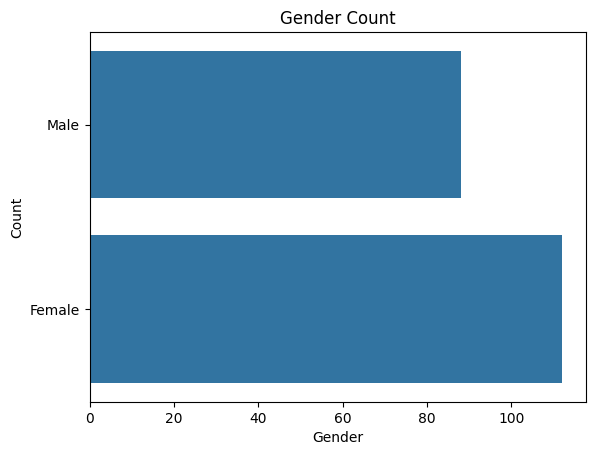

In [35]:
gendercount = df['Gender'].value_counts()
gendercount
sns.countplot(df['Gender'] )
plt.title("Gender Count")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

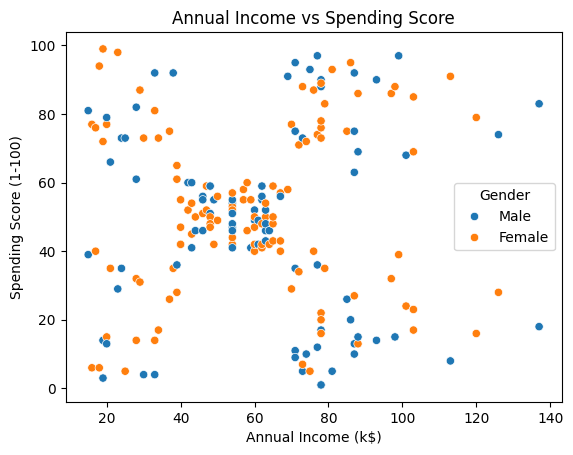

In [36]:
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender')
plt.title("Annual Income vs Spending Score")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.show()

In [37]:
df_clean = df.drop('CustomerID', axis = 1)
df_clean = pd.get_dummies(df_clean, columns=['Gender'], drop_first=True)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_clean)


In [38]:
df_scaled

array([[-1.42456879, -1.73899919, -0.43480148,  1.12815215],
       [-1.28103541, -1.73899919,  1.19570407,  1.12815215],
       [-1.3528021 , -1.70082976, -1.71591298, -0.88640526],
       [-1.13750203, -1.70082976,  1.04041783, -0.88640526],
       [-0.56336851, -1.66266033, -0.39597992, -0.88640526],
       [-1.20926872, -1.66266033,  1.00159627, -0.88640526],
       [-0.27630176, -1.62449091, -1.71591298, -0.88640526],
       [-1.13750203, -1.62449091,  1.70038436, -0.88640526],
       [ 1.80493225, -1.58632148, -1.83237767,  1.12815215],
       [-0.6351352 , -1.58632148,  0.84631002, -0.88640526],
       [ 2.02023231, -1.58632148, -1.4053405 ,  1.12815215],
       [-0.27630176, -1.58632148,  1.89449216, -0.88640526],
       [ 1.37433211, -1.54815205, -1.36651894, -0.88640526],
       [-1.06573534, -1.54815205,  1.04041783, -0.88640526],
       [-0.13276838, -1.54815205, -1.44416206,  1.12815215],
       [-1.20926872, -1.54815205,  1.11806095,  1.12815215],
       [-0.27630176, -1.

In [39]:
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_scaled)
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,2
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,4
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,3
196,197,Female,45,126,28,3
197,198,Male,32,126,74,2
198,199,Male,32,137,18,1


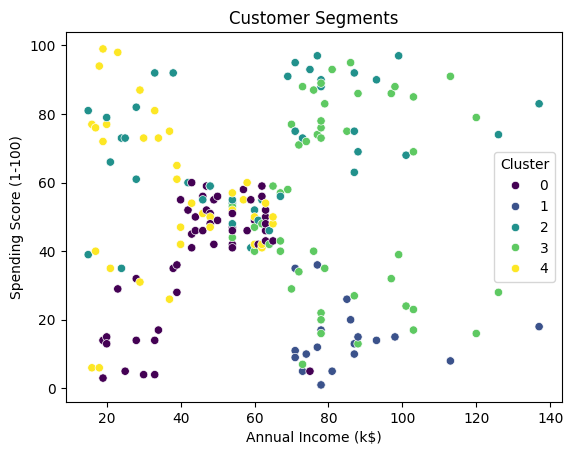

In [40]:
sns.scatterplot(data=df, x='Annual Income (k$)', y= 'Spending Score (1-100)', hue='Cluster',palette='viridis')
plt.title("Customer Segments")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.show()

In [41]:
cluster_summary = df.groupby('Cluster').mean(numeric_only =True).round(2)
display(cluster_summary)

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,,
0,65.33,56.47,46.10,39.31
1,159.50,39.50,85.15,14.05
2,100.81,28.69,60.90,70.24
3,151.51,37.90,82.12,54.45
4,50.53,27.32,38.84,56.21


In [42]:
cluster_labels = {
    4: 'Young Spenders',
    2: 'Young Premium Spenders',
    3: 'Mid-age Budget Shoppers',
    0: 'Older Budget Shoppers',
    1: 'Wealthy Low Spenders'
}
df['Segment'] = df['Cluster'].map(cluster_labels)
df[['Cluster','Segment']].head()

,Cluster,Segment
0,2,Young Premium Spenders
1,2,Young Premium Spenders
2,4,Young Spenders
3,4,Young Spenders
4,4,Young Spenders


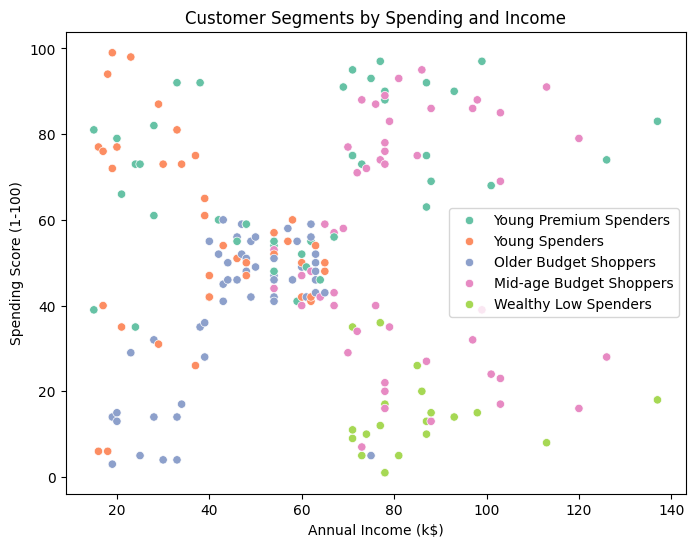

In [43]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Segment', palette='Set2')
plt.title('Customer Segments by Spending and Income')
plt.legend(loc='best')
plt.show()

In [44]:
segment_counts = df['Segment'].value_counts()
display(segment_counts)

,count
Segment,
Older Budget Shoppers,51
Mid-age Budget Shoppers,49
Young Premium Spenders,42
Young Spenders,38
Wealthy Low Spenders,20


In [47]:
summary = df.groupby('Segment').agg({
    'Age': 'mean',
    'Annual Income (k$)': 'mean',
    'Spending Score (1-100)': 'mean',
    'CustomerID':'count'
}).rename(columns={'CustomerID':'Number of Customers'})
summary = summary.round(2).sort_values('Spending Score (1-100)', ascending=False)
display(summary)

,Age,Annual Income (k$),Spending Score (1-100),Number of Customers
Segment,,,,
Young Premium Spenders,28.69,60.90,70.24,42
Young Spenders,27.32,38.84,56.21,38
Mid-age Budget Shoppers,37.90,82.12,54.45,49
Older Budget Shoppers,56.47,46.10,39.31,51
Wealthy Low Spenders,39.50,85.15,14.05,20


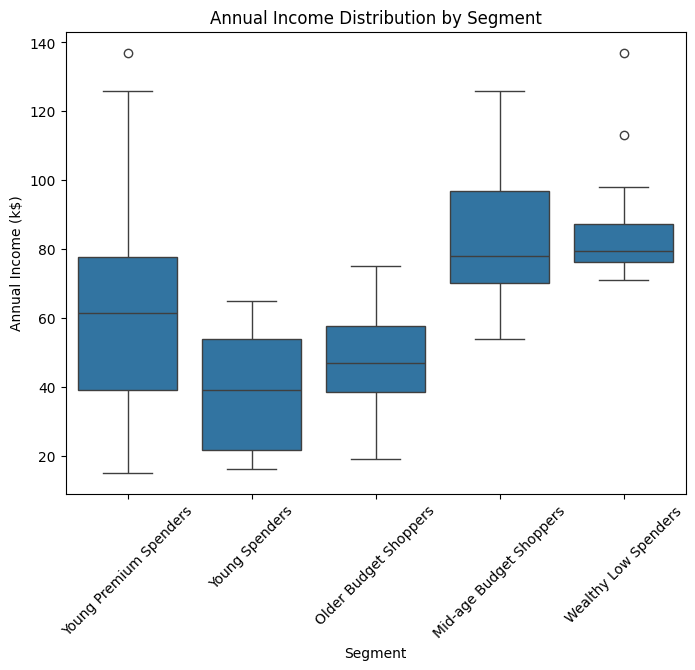

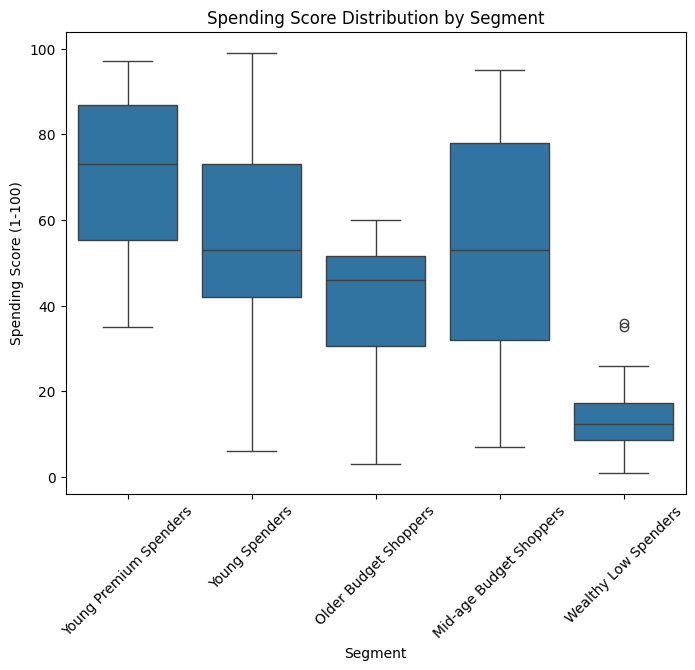

In [49]:
# Boxplot for income by segment
plt.figure(figsize=(8,6))
sns.boxplot(x='Segment', y='Annual Income (k$)', data=df)
plt.xticks(rotation=45)
plt.title('Annual Income Distribution by Segment')
plt.show()

# Boxplot for spending by segment
plt.figure(figsize=(8,6))
sns.boxplot(x='Segment', y='Spending Score (1-100)', data=df)
plt.xticks(rotation=45)
plt.title('Spending Score Distribution by Segment')
plt.show()

In [51]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')
X_hc = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
df['Cluster_hc']= hc.fit_predict(X_hc)
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster,Segment,Cluster_hc
0,1,Male,19,15,39,2,Young Premium Spenders,4
1,2,Male,21,15,81,2,Young Premium Spenders,3
2,3,Female,20,16,6,4,Young Spenders,4
3,4,Female,23,16,77,4,Young Spenders,3
4,5,Female,31,17,40,4,Young Spenders,4
...,...,...,...,...,...,...,...,...
195,196,Female,35,120,79,3,Mid-age Budget Shoppers,2
196,197,Female,45,126,28,3,Mid-age Budget Shoppers,1
197,198,Male,32,126,74,2,Young Premium Spenders,2
198,199,Male,32,137,18,1,Wealthy Low Spenders,1


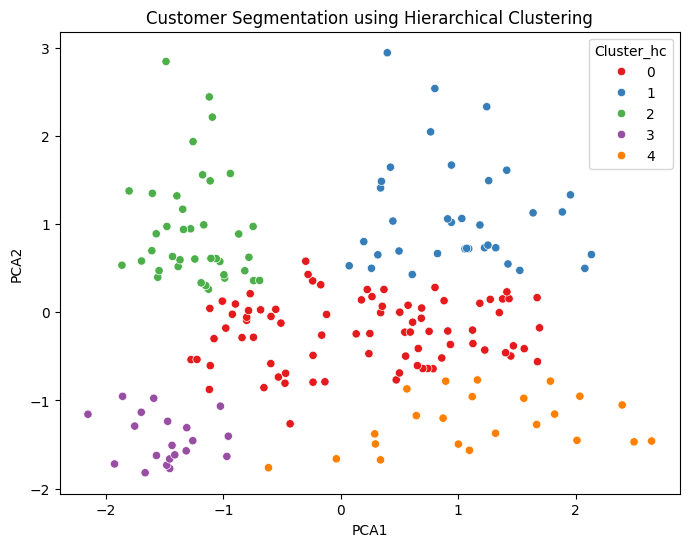

In [52]:
from sklearn.decomposition import PCA
X_pca = scaler.fit_transform(X_hc)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_pca)

df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]

plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster_hc', palette='Set1')
plt.title('Customer Segmentation using Hierarchical Clustering')
plt.show()

In [54]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(X_hc, df['Cluster_hc'])
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.4401889024290193


In [61]:
# KMeans (Original)
kmeans_orig = KMeans(n_clusters=5, random_state=42, n_init=10)
labels_kmeans_orig = kmeans_orig.fit_predict(df_scaled)
score_kmeans_orig = silhouette_score(df_scaled, labels_kmeans_orig)
print("KMeans (Original):", round(score_kmeans_orig, 4))

# KMeans (PCA)
kmeans_pca = KMeans(n_clusters=5, random_state=42, n_init=10)
labels_kmeans_pca = kmeans_pca.fit_predict(X_pca)
score_kmeans_pca = silhouette_score(X_pca, labels_kmeans_pca)
print("KMeans (PCA):", round(score_kmeans_pca, 4))

# Hierarchical (Original)
hier_orig = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')
labels_hier_orig = hier_orig.fit_predict(X_hc)
score_hier_orig = silhouette_score(X_hc, labels_hier_orig)
print("Hierarchical (Original):", round(score_hier_orig, 4))

# Step 7: Hierarchical (PCA)
hier_pca = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')
labels_hier_pca = hier_pca.fit_predict(X_pca)
score_hier_pca = silhouette_score(X_pca, labels_hier_pca)
print("Hierarchical (PCA):", round(score_hier_pca, 4))


KMeans (Original): 0.3041
KMeans (PCA): 0.3931
Hierarchical (Original): 0.4402
Hierarchical (PCA): 0.3806
